In [1]:
# imports 
import emp_preprocessing as ep
import emp_fake_data as ef
import emp_metrics as em
import emp_graphics as eg
import networkx as nx
import graphics as gx
import functions as fct
import numpy as np
import pandas as pd

# parameters
agg_periods = [1, 50, 100, 250]
path_results = "./results/general-testing/"

# data preprocessing

In [6]:
# load fake data
df_mmsr = ef.get_df_mmsr(nb_tran=5000)
dic_obs_adj_cr, dic_obs_adj_tr = ep.build_from_data(df_mmsr=df_mmsr)

  3%|▎         | 157/5000 [00:02<00:46, 103.81it/s]

In [2]:
# load data (faster)
dic_obs_adj_cr, dic_obs_adj_tr = ep.get_dic_obs_adj_cr(), ep.get_dic_obs_adj_tr()

# metrics measurement

In [ ]:
# get aggregated adjency matrices
dic_binary_adjs = em.get_binary_adjs(dic_obs_adj_tr, agg_periods)

## jaccard

In [ ]:
# get jaccard
dic_jaccard = em.get_jaccard(dic_binary_adjs)
eg.plot_jaccard_aggregated(dic_jaccard, path_results)

## density

In [ ]:
# get density
dic_density = em.get_density(dic_binary_adjs)
eg.plot_network_density(dic_density, path_results)

## distribution of in and out degree

In [ ]:
# get degree distribution

# for the transactions aggregated
dic_in_degree_distribution, dic_out_degree_distribution = em.get_degree_distribution(dic_binary_adjs)
eg.plot_degree_distribution(
    dic_in_degree_distribution, dic_out_degree_distribution, path_results, name="degree_distribution_tr"
)

In [ ]:
# for the exposures
dic_binary_adjs = em.get_binary_adjs(dic_obs_adj_cr, [1])
dic_in_degree_distribution, dic_out_degree_distribution = em.get_degree_distribution(dic_binary_adjs)
eg.plot_degree_distribution(
    dic_in_degree_distribution, dic_out_degree_distribution, path_results, name="degree_distribution_cr"
)

## core periphery

In [5]:
# get cp structure

# for the exposures : to be checked wether the cpnet librairie handles weighted graph, I don't remember

dic_binary_adjs = em.get_binary_adjs(dic_obs_adj_cr, [1])

dic_p_value = em.get_n_plot_cp_test(dic_binary_adjs, save_every=100, path_results=path_results)

100%|██████████| 300/300 [00:00<00:00, 764.94it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.895171970302426] 


100%|██████████| 300/300 [00:00<00:00, 606.97it/s]


1 core-periphery structure(s) detected, but 1 significant, p-values are [0.009972509744850422] 


100%|██████████| 300/300 [00:00<00:00, 437.78it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [nan] 


100%|██████████| 300/300 [00:00<00:00, 570.16it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [nan] 


100%|██████████| 300/300 [00:00<00:00, 508.12it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [nan] 


In [3]:
# build the dic_binary_adjs
dic_binary_adjs = em.get_binary_adjs(dic_obs_adj_tr, agg_periods=[1,50])
dic_p_value = em.get_n_plot_cp_test(dic_binary_adjs, save_every=100, path_results=path_results)

100%|██████████| 300/300 [00:00<00:00, 693.20it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.8822186257111552] 


100%|██████████| 300/300 [00:00<00:00, 731.56it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.9097598199431296] 


100%|██████████| 300/300 [00:00<00:00, 470.04it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.9650979183912886] 


100%|██████████| 300/300 [00:00<00:00, 359.91it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.9482436363798101] 


100%|██████████| 300/300 [00:01<00:00, 271.44it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.923310065529725] 


100%|██████████| 300/300 [00:01<00:00, 220.89it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.9218553773770056] 


100%|██████████| 300/300 [00:01<00:00, 175.35it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.9344525638751838] 


100%|██████████| 300/300 [00:00<00:00, 322.21it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.937524460666088] 


100%|██████████| 300/300 [00:00<00:00, 516.43it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.9854035337836586] 


100%|██████████| 300/300 [00:00<00:00, 523.19it/s]


1 core-periphery structure(s) detected, but 0 significant, p-values are [0.9822626622398711] 


In [4]:
dic_p_value

{1: [1,
  [0.8822186257111552],
  [0.9650979183912886],
  [0.923310065529725],
  [0.9344525638751838],
  [0.9854035337836586]],
 50: [1,
  [0.9097598199431296],
  [0.9482436363798101],
  [0.9218553773770056],
  [0.937524460666088],
  [0.9822626622398711]]}

## asset per degree

In [ ]:
ef.get_df_finrep()

,lei,date,total_assets
0,bank_0,2020-01-01,58.990529
1,bank_1,2020-01-01,50.501149
2,bank_2,2020-01-01,5.344294
3,bank_3,2020-01-01,90.204711
4,bank_4,2020-01-01,64.365055
...,...,...,...
1245,bank_45,2044-01-01,50.109490
1246,bank_46,2044-01-01,91.466958
1247,bank_47,2044-01-01,75.007440
1248,bank_48,2044-01-01,12.931336


# tools

<BarContainer object of 6 artists>

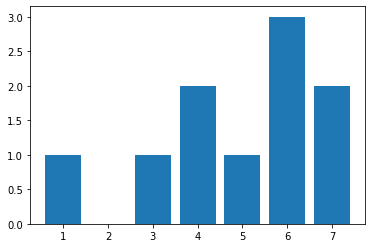

In [ ]:
from matplotlib import pyplot as plt
binary_adj = np.random.randint(0,2,(10,10))
bank_network = nx.from_numpy_matrix(
            binary_adj,
            parallel_edges=False,
            create_using=nx.DiGraph,
        )  # first define a networkx object.

ar_in_degree = np.array(bank_network.in_degree())[:,1]
hist = np.unique(ar_in_degree, return_counts=True)
plt.bar(*hist)
